## Histogram Equilisation and Histogram Matching

# Image Histogram:
The image histogram indicates the intensity distribution of an image. In other words, the image histogram shows the number of pixels in an image having a specific intensity value. As an example, assume a normal image with pixel intensities varies from 0 to 255. In order to generate its histogram we only need to count the number of pixels having intensity value 0, then 1 and continue to the 255.

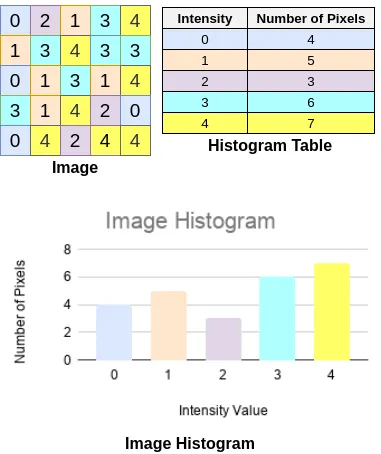

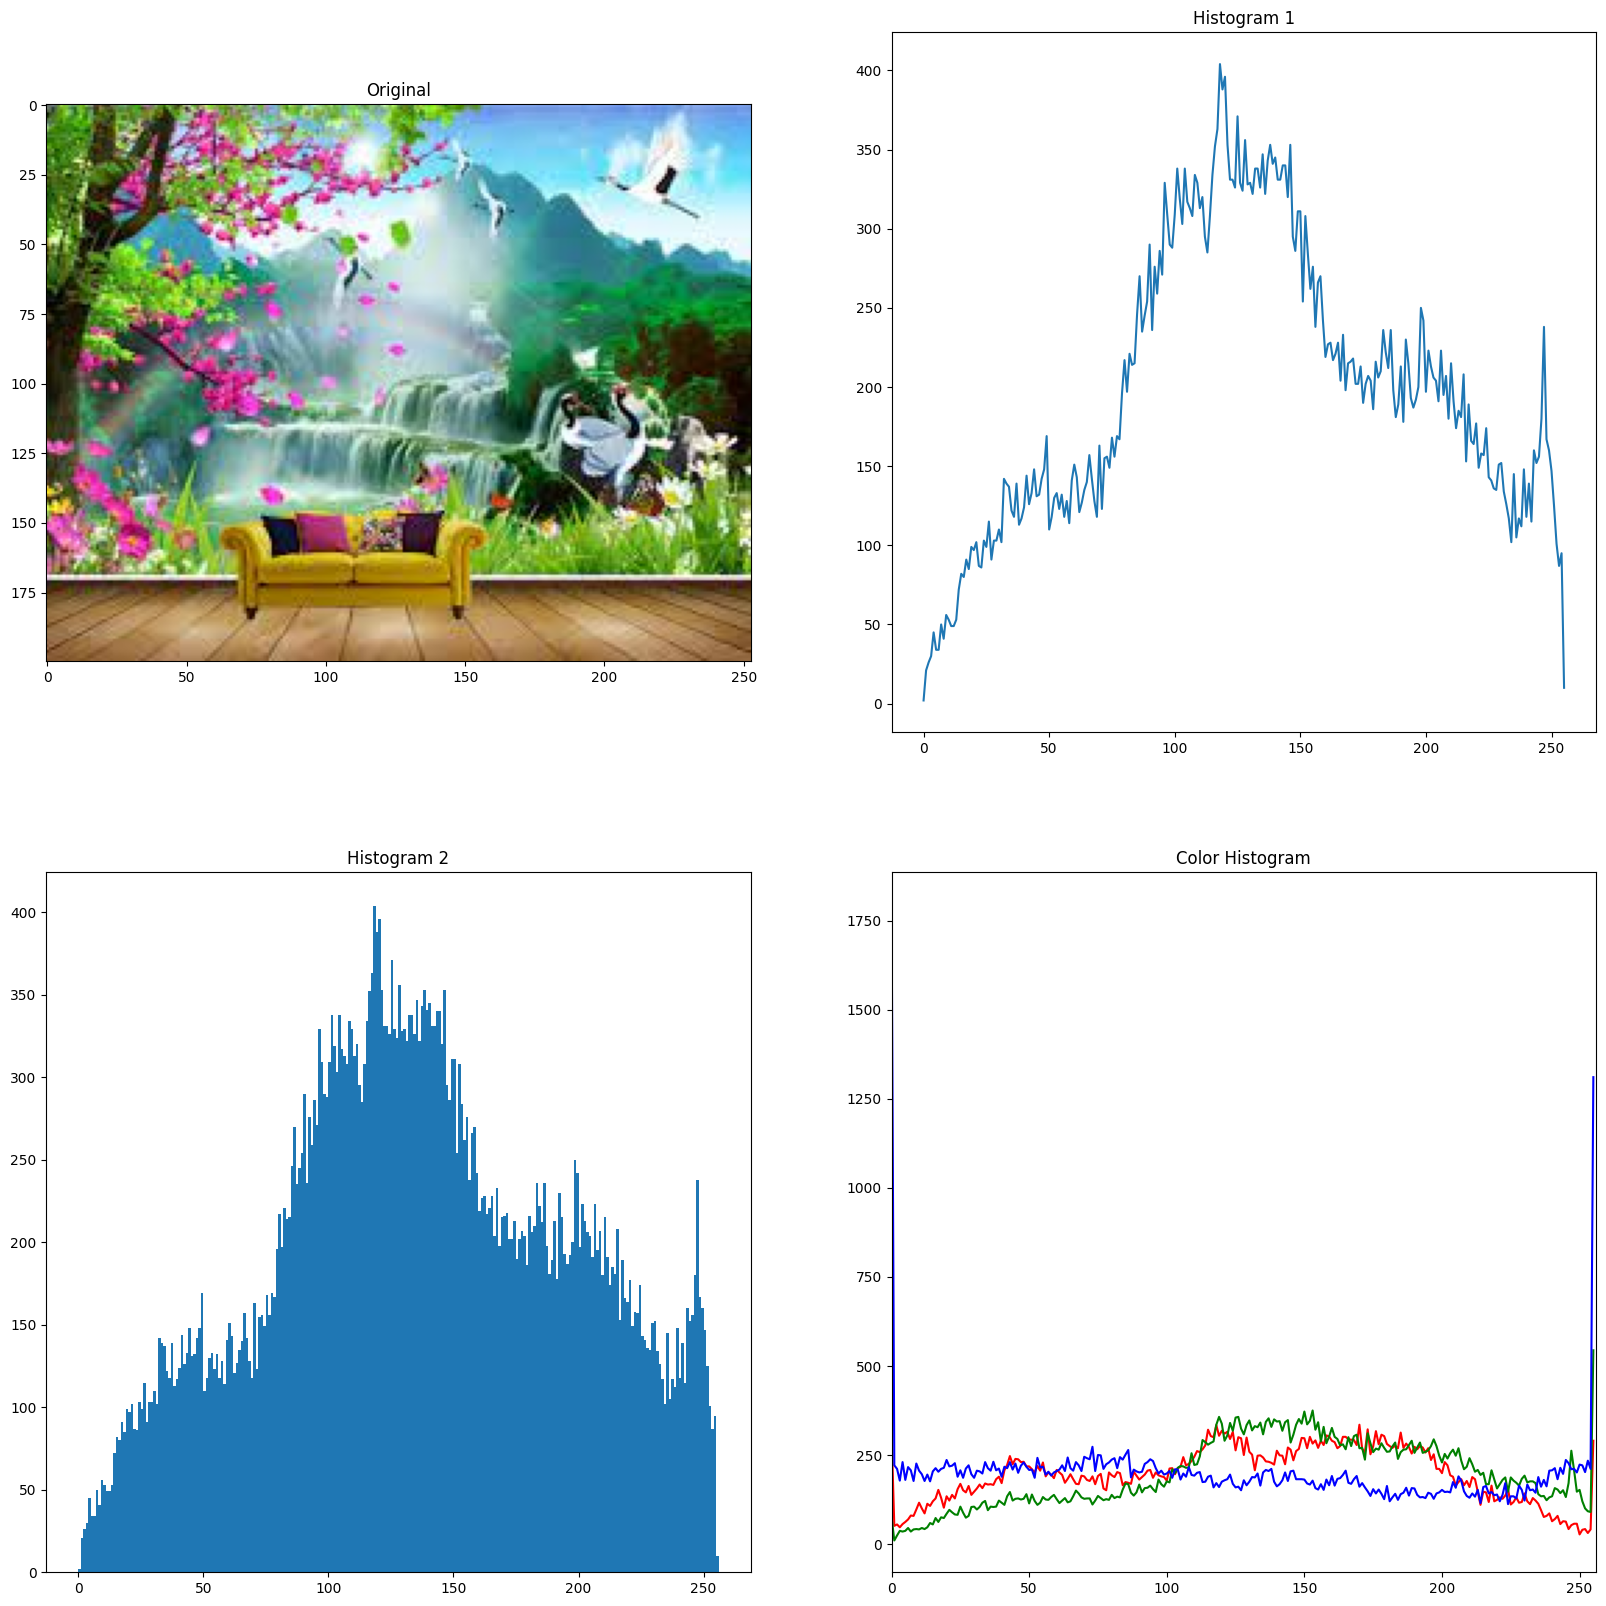

In [2]:
# Plotting the image histogram of an color image using Open cv

# Importing OpenCV
import cv2

# Importing numpy
import numpy as np

# Importing matplotlib.pyplot
import matplotlib.pyplot as plt

# Reading the image
img = cv2.imread('/content/drive/MyDrive/colabdataset/scenerie.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Setting the grid size
plt.figure(figsize=(20,20))

# Plotting the original image
plt.subplot(221)
plt.title('Original')
plt.imshow(img)

# Plotting the histogram for the image
img_hist = cv2.calcHist([img_1],[0],None,[256],[0,256])
plt.subplot(222)
plt.title('Histogram 1')
plt.plot(img_hist)

# Plotting the histogram using the ravel function
plt.subplot(223)
plt.hist(img_1.ravel(), 256, [0,256])
plt.title('Histogram 2')

# Plotting the histogram for colors in the image
for i, col in enumerate(['r', 'g', 'b']):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.subplot(224)
    plt.title('Color Histogram')
    plt.plot(hist, color = col)
    plt.xlim([0, 256])

# Histogram Equilisation:
Histogram equalization is an image processing method to adjust the contrast of an image using its intensity distribution histogram.

cv2.equalizeHist() function in OpenCV performs histogram equalization to improve the contrast of the images and stretch the intensity range for the image histogram. The function takes a grayscale image as the input and returns an equalized image.

How to equalize the histogram of an image:

Histogram equalization is commonly used in order to enhance the contrast of the image. Accordingly, this technique can’t guarantee to always improve the quality of the image. Calculating CDF (cumulative distributive function) is a common way to equalizing the histogram of an image. In Fig.2, we have calculated the CDF for the sample image that we created in Fig.1. Furthermore, in Fig.3 we show the equalized histogram of the previous sample.

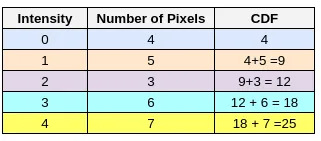

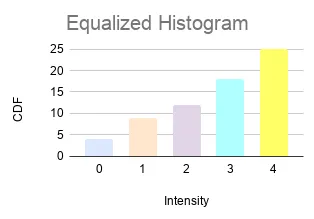

#Histogram equalisation of gray scale image


Procedure of histogram equalization technique:
1. The intensity values for each pixel of the image are used to compute an image histogram.

2. The cluttered intensity values are evenly distributed and the range of intensity values is increased.

3. Remapping of the histogram is done using the cumulative distribution function.

4. The output obtained is a histogram equalized image with increased global contrast.

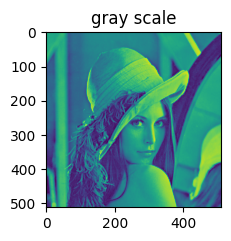

In [17]:
# Reading the image
img_2 = cv2.imread('/content/drive/MyDrive/colabdataset/Lenna.png')
grayscale = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)
# Setting the grid size
plt.figure(figsize=(5,5))

# Plotting the original image
plt.subplot(221)
plt.title('gray scale')
plt.imshow(grayscale)

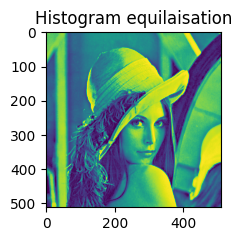

In [18]:

# Applying the Histogram equalization using the cv2.equalizeHist() function
final_image = cv2.equalizeHist(grayscale)
# Displaying the image
# Setting the grid size
plt.figure(figsize=(5,5))

# Plotting the original image
plt.subplot(221)
plt.title('Histogram equilaisation')
plt.imshow(final_image)

# Histogram equilisation of  colour image

We can do this in OpenCV using a function cv2.equalizeHist(). If its input is just grayscale image, then output is our histogram equalized image.
Channel splitting and equalizing each channel separately is not the proper way for equalization of contrast. Equalization involves Intensity values of the image not the color components. So for a simple RGB color image, HE should not be applied individually on each channel. Rather, it should be applied such that intensity values are equalized without disturbing the color balance of the image. So, the first step is to convert the color space of the image from RGB into one of the color spaces which separate intensity values from color components.
such as HSV,YUV

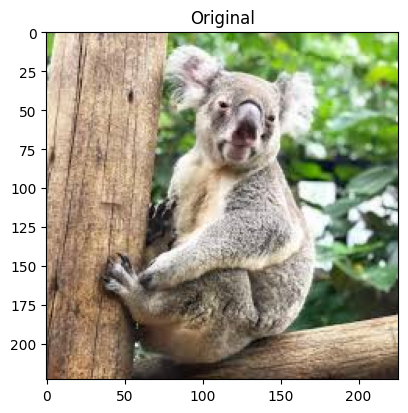

In [33]:
# Reading the image
image =cv2. imread('/content/drive/MyDrive/colabdataset/Animal_classification_dataset/train/koala/0eb924dd00(1).jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Displaying the original image
# Setting the grid size
plt.figure(figsize=(10,10))

# Plotting the original image
plt.subplot(221)
plt.title('Original')
plt.imshow(image)

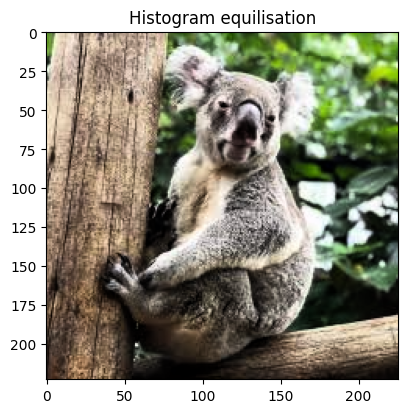

In [34]:
# Convert image from RGB to HSV
img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
# Histogram equalisation on the V-channel
img_hsv[:, :, 2] = cv2.equalizeHist(img_hsv[:, :, 2])
# Convert image back from HSV to RGB
image = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)

# Displaying the original image
# Setting the grid size
plt.figure(figsize=(10,10))

# Plotting the original image
plt.subplot(221)
plt.title('Histogram equilisation')
plt.imshow(image)


# Histogram Matching using Opencv and scikit builtin function:
Assume we have two images and each has its specific histogram. So we want to answer this question before going further, is it possible to modify one image based on the contrast of another one? And the answer is YES. In fact, this is the definition of the histogram matching. In other words, given images A, and B, it is possible to modify the contrast level of A according to B.

Histogram matching is useful when we want to unify the contrast level of a group of images.

In order to match the histogram of images A and B, we need to first equalize the histogram of both images. Then, we need to map each pixel of A to B using the equalized histograms. Then we modify each pixel of A based on B.

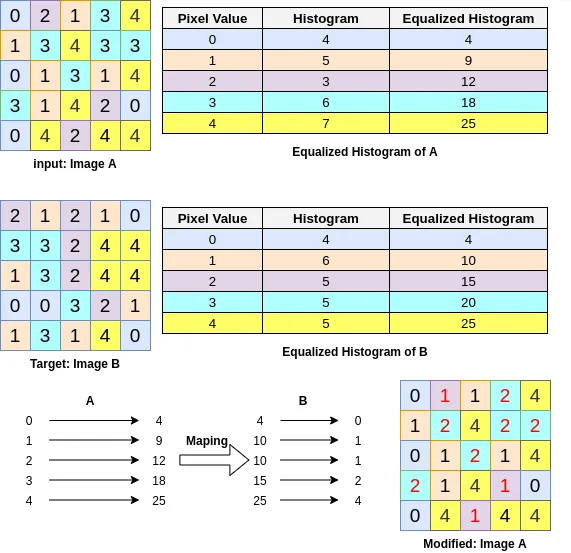

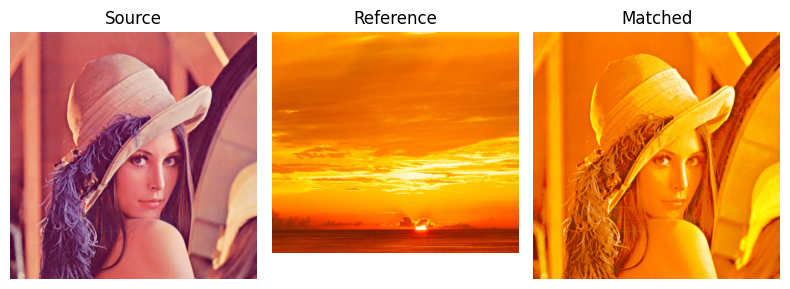

In [40]:
from skimage import exposure
from skimage.exposure import match_histograms
src = cv2.imread('/content/drive/MyDrive/colabdataset/Lenna.png')
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
ref = cv2.imread('/content/drive/MyDrive/colabdataset/sunset.jpg')
ref = cv2.cvtColor(ref, cv2.COLOR_BGR2RGB)
matched = match_histograms(src, ref, channel_axis=-1)

fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=1, ncols=3, figsize=(8, 3), sharex=True, sharey=True
)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(src)
ax1.set_title('Source')
ax2.imshow(ref)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()



# Histogram matching user defined function

In [92]:
from skimage.io import imread                         # load the image
from skimage.exposure import cumulative_distribution  # calculate the cumulative pixel value
import numpy as np                                    # reshape the image
import matplotlib.pyplot as plt                       # plot the result

In [93]:
# read/load the input and template image
image_4 = imread('/content/drive/MyDrive/colabdataset/Lenna.png').astype(np.uint8)
imageTemp = imread('/content/drive/MyDrive/colabdataset/sunset.jpg').astype(np.uint8)

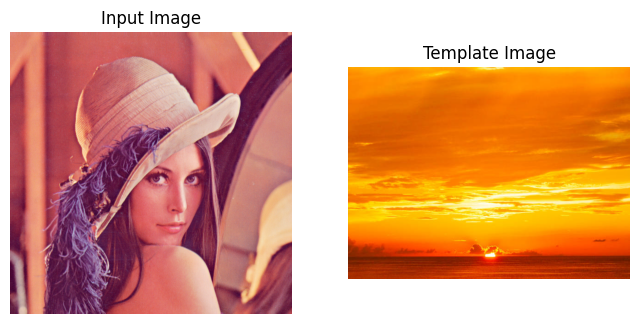

In [94]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.title('Input Image')
plt.imshow(image_4, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Template Image')
plt.imshow(imageTemp, cmap='gray')
plt.axis('off')
plt.show()

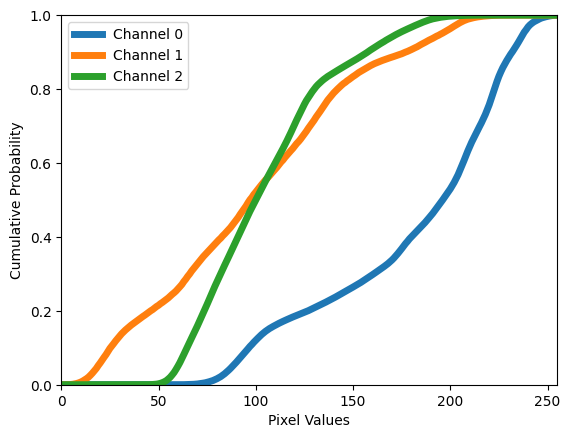

In [95]:
#CUMULATIVE DISTRIBUTION of input image
for channel in range(3):
  cdfImageInput, binsImageInput = cumulative_distribution(image_4[:,:,channel])
  cdfImageInput = np.insert(cdfImageInput, 0, [0]*binsImageInput[0]) # Fill 0 in index 0 - 3
  cdfImageInput = np.append(cdfImageInput, [1]*(255-binsImageInput[-1]))
    # Ensure cdfImageInput and binsImageInput have the same length
  binsImageInput = np.linspace(0, 255, len(cdfImageInput))
  plt.plot(binsImageInput, cdfImageInput, linewidth=5,label=f'Channel {channel}')
  plt.xlim(0,255)
  plt.ylim(0,1)
  plt.xlabel('Pixel Values')
  plt.ylabel('Cumulative Probability')
  plt.legend()
plt.show()

In [96]:
# check the first and last bins and probability
print(f"First bins: {binsImageInput[0]}, Cumulative Probability: {cdfImageInput[0]:.5f}")
print(f"Last bins: {binsImageInput[-1]}, CUmulative Probability: {cdfImageInput[0]:.5f}")

First bins: 0.0, Cumulative Probability: 0.00000
Last bins: 255.0, CUmulative Probability: 0.00000


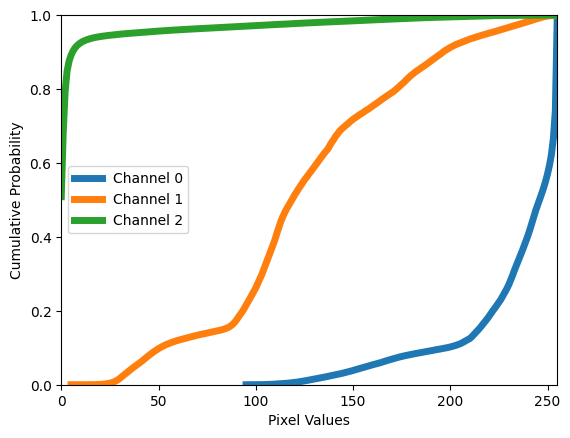

In [97]:
#CUMULATIVE DISTRIBUTION of template image
for channel in range(3):
  cdfImageTemp, binsImageTemp = cumulative_distribution(imageTemp[:,:,channel])
  plt.plot(binsImageTemp, cdfImageTemp, linewidth=5,label=f'Channel {channel}')
  plt.xlim(0,255)
  plt.ylim(0,1)
  plt.xlabel('Pixel Values')
  plt.ylabel('Cumulative Probability')
  plt.legend()
plt.show()

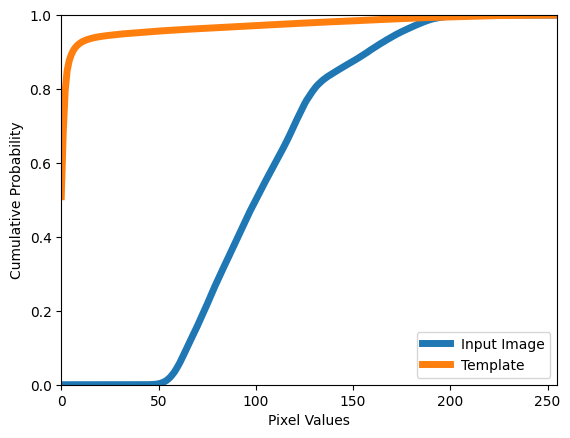

In [98]:
plt.plot(cdfImageInput, linewidth=5, label='Input Image')
plt.plot(cdfImageTemp, linewidth=5, label='Template')
plt.xlim(0,255)
plt.ylim(0,1)
plt.xlabel('Pixel Values')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

In [99]:
# Histogram matching
# Create an array of pixel values
pixels = np.arange(256)
pixels

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

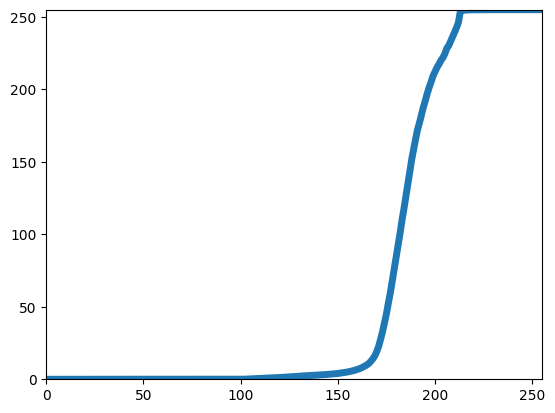

In [100]:
new_pixels = np.interp(cdfImageInput, cdfImageTemp, pixels)
plt.plot(new_pixels, linewidth=5)
plt.xlim(0,255)
plt.ylim(0,255)
plt.show()

In [101]:
# Map and Reshape to 2D array
imageOut = (np.reshape(new_pixels[image_4.ravel()], image_4.shape)).astype(np.uint8)

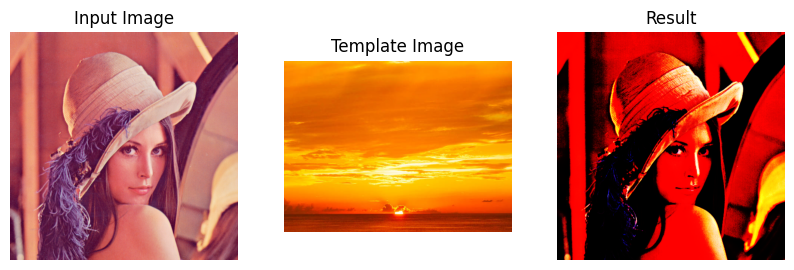

In [102]:
# Preview the result
plt.figure(figsize=(10,7))
plt.subplot(1,3,1)
plt.title('Input Image')
plt.imshow(image_4, cmap='gray')
plt.axis('off')
plt.subplot(1,3,2)
plt.title('Template Image')
plt.imshow(imageTemp, cmap='gray')
plt.axis('off')
plt.subplot(1,3,3)
plt.title('Result')
plt.imshow(imageOut, cmap='gray')
plt.axis('off')
plt.show()

Histogram Matching In single code

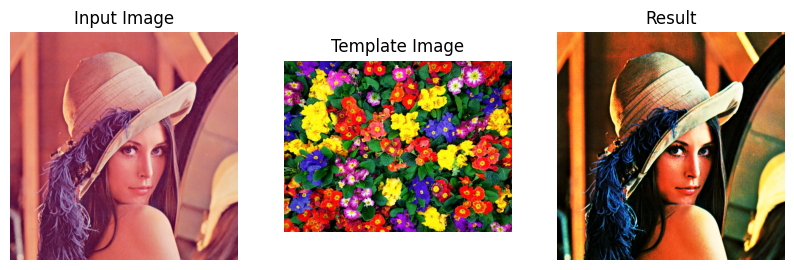

In [103]:
# get the CDF
def getCDF(image):
    cdf, bins = cumulative_distribution(image)
    cdf = np.insert(cdf, 0, [0]*bins[0])
    cdf = np.append(cdf, [1]*(255-bins[-1]))
    return cdf

# histogram matching
def histMatch(cdfInput, cdfTemplate, imageInput):
    pixelValues = np.arange(256)
    new_pixels = np.interp(cdfInput, cdfTemplate, pixels)
    imageMatch = (np.reshape(new_pixels[imageInput.ravel()], imageInput.shape)).astype(np.uint8)
    return imageMatch

# Preview the result
def plotResult(imInput, imTemplate, imResult):
    plt.figure(figsize=(10,7))
    plt.subplot(1,3,1)
    plt.title('Input Image')
    plt.imshow(imInput)
    plt.axis('off')
    plt.subplot(1,3,2)
    plt.title('Template Image')
    plt.imshow(imTemplate)
    plt.axis('off')
    plt.subplot(1,3,3)
    plt.title('Result')
    plt.imshow(imResult)
    plt.axis('off')
    plt.show()

# read/load the input and template image
image_5 = imread('/content/drive/MyDrive/colabdataset/Lenna.png').astype(np.uint8)
imageTemplate = imread('/content/drive/MyDrive/colabdataset/flower.jpg').astype(np.uint8)

# create a matrix for result
imageResult = np.zeros((image_5.shape)).astype(np.uint8)

# cdf and histogram
for channel in range(3):
    cdfInput = getCDF(image_5[:,:,channel])
    cdfTemplate = getCDF(imageTemplate[:,:,channel])
    imageResult[:,:,channel] = histMatch(cdfInput, cdfTemplate, image_5[:,:,channel])

# plot
plotResult(image_5, imageTemplate, imageResult)